In [1]:
import os

In [2]:
TOP = os.getcwd().replace('notebooks','')
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [3]:
figures_dir

'/home/grace/Documents/python/tsca_categories/reports/figures/'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
%matplotlib inline

In [5]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


In [6]:
import glob

In [7]:
vega1 =pd.read_csv(external_dir+'vega_110624.csv', index_col = [0])

In [8]:
len([e for e in vega1.columns if 'prediction' in e])

33

In [9]:
models = [e for e in vega1.columns if 'prediction' in e]

In [10]:
vega1[models[10]]

0      -1.01
1       0.32
2      -0.84
3       0.66
4       0.24
       ...  
994     0.55
995      0.6
996    -1.36
998     0.25
999    -1.34
Name: Carcinogenicity inhalation Slope Factor model (IRFMN)-prediction [log(1/(mg/kg-day))], Length: 12928, dtype: object

In [11]:
vega1 = vega1.set_index('dtxsid')

In [12]:
cols_del = []
for e in vega1[models]:
    if  ('mg/kg' in e) or ('mmol/kg'  in e) or ('Slope'  in e) or ('CORAL'  in e):
        cols_del.append(e)
     

In [14]:
cols_del = ['Carcinogenicity oral Slope Factor model (IRFMN)-prediction [log(1/(mg/kg-day))]',
 'Carcinogenicity inhalation Slope Factor model (IRFMN)-prediction [log(1/(mg/kg-day))]',
 'Carcinogenicity in male rat (CORAL)-prediction',
 'Carcinogenicity in female Rat (CORAL)-prediction',
 'Acute Toxicity (LD50) model (KNN)-prediction [log(mmol/kg)]',
 'NOAEL (CONCERT/Coral)-prediction [log(mg/kg bw)]',
 'NOAEL (IRFMN-CORAL)-prediction [-log(mg/kg)]',
 'Liver NOAEL (CORAL)-prediction [log(mg/kg bw)]']



In [15]:
vega2 = vega1[[col for col in models if col  not in cols_del]]

In [16]:
mappings = []
for col in vega2.columns:
    mappings.append(vega2[col].unique().tolist())

In [17]:
mapping_dict = (list(set([e for i in mappings for e in i])))

In [18]:
mapping_dict = {k:v for k,v in zip(mapping_dict, mapping_dict)}

In [20]:
mapping_dict = {'Toxic':1,
 'SNAr-Nucleophilic Aromatic Substitution':1,
 'Non Predicted': 0,
 'Mutagenic': 1,
 'Toxicant':1,
 'Carcinogen': 1,
 'NON-Sensitizer': 0,
 'No class found': 0,
 'NON-Mutagenic': 0,
 'Active':1,
 'Not Classifiable':0,
 'SN2-Nucleophilic Aliphatic Substitution': 1,
 'NON-genotoxic': 0,
 'Inactive': 0,
 'NON-Toxicant': 0,
 'Michael Acceptor': 1,
 'NOT IRRITANT': 0,
 'Possible NON-Carcinogen': 0,
 'Acyl Transfer Agents': 1,
 'Schiff Base Formation': 1,
 'Sensitizer': 1,
 'IRRITANT': 1,
 'Not predicted': 0,
 'NON-Toxic': 0,
 'NON-Carcinogen':0,
 'Irritating': 1,
 'Unknown': np.nan,
 'NON-Irritating': 0,
 '-': np.nan,
 'Genotoxic':1}

<Axes: ylabel='dtxsid'>

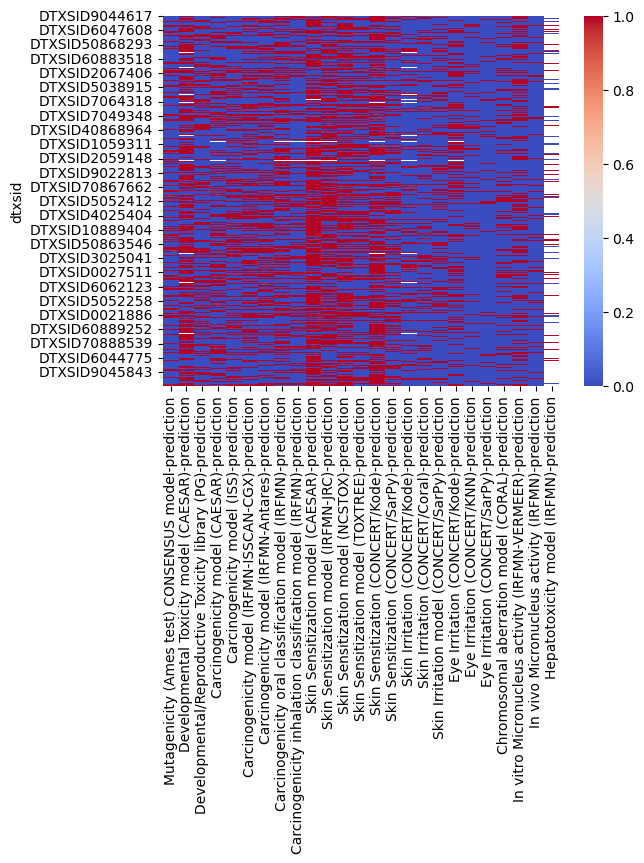

In [21]:
sns.heatmap(vega2.replace(mapping_dict), cmap = 'coolwarm')

In [22]:
vega3 = vega2.replace(mapping_dict)

In [23]:
vega3.to_csv(interim_dir+'vega_binary_091124.csv')

In [24]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])


In [25]:
df['group_str'].nunique()

180

In [26]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [27]:
vega3

,Mutagenicity (Ames test) CONSENSUS model-prediction,Developmental Toxicity model (CAESAR)-prediction,Developmental/Reproductive Toxicity library (PG)-prediction,Carcinogenicity model (CAESAR)-prediction,Carcinogenicity model (ISS)-prediction,Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction,Carcinogenicity model (IRFMN-Antares)-prediction,Carcinogenicity oral classification model (IRFMN)-prediction,Carcinogenicity inhalation classification model (IRFMN)-prediction,Skin Sensitization model (CAESAR)-prediction,...,Skin Irritation (CONCERT/Kode)-prediction,Skin Irritation (CONCERT/Coral)-prediction,Skin Irritation model (CONCERT/SarPy)-prediction,Eye Irritation (CONCERT/Kode)-prediction,Eye Irritation (CONCERT/KNN)-prediction,Eye Irritation (CONCERT/SarPy)-prediction,Chromosomal aberration model (CORAL)-prediction,In vitro Micronucleus activity (IRFMN-VERMEER)-prediction,In vivo Micronucleus activity (IRFMN)-prediction,Hepatotoxicity model (IRFMN)-prediction
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID9044617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
DTXSID40867331,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
DTXSID0065199,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
DTXSID90881284,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
DTXSID1021900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID3067314,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
DTXSID1063722,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
DTXSID4021975,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [28]:
alerts_lst = []
for col in vega3.columns.tolist():
    alerts_lst.append([col, vega3[col].sum()])

In [29]:
cols = vega3.columns.tolist()
def chk_sum(s):
    return 100*(s.sum()/len(s))
(vega3
 .pipe(lambda x: chk_sum(x))
)

Mutagenicity (Ames test) CONSENSUS model-prediction                   23.847463
Developmental Toxicity model (CAESAR)-prediction                      59.537438
Developmental/Reproductive Toxicity library (PG)-prediction           30.074257
Carcinogenicity model (CAESAR)-prediction                             38.412748
Carcinogenicity model (ISS)-prediction                                34.282178
Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction                   40.818379
Carcinogenicity model (IRFMN-Antares)-prediction                      36.811572
Carcinogenicity oral classification model (IRFMN)-prediction          44.948948
Carcinogenicity inhalation classification model (IRFMN)-prediction    27.506188
Skin Sensitization model (CAESAR)-prediction                          69.546720
Skin Sensitization model (IRFMN-JRC)-prediction                       55.283106
Skin Sensitization model (NCSTOX)-prediction                          57.758354
Skin Sensitization model (TOXTREE)-predi

In [30]:
#vega3

In [31]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [32]:
#vega3

In [33]:
vega_1 = (vega3.reset_index()
 .assign(group_str = vega3.reset_index()['dtxsid'].replace(mydict ))
 )

In [34]:
vega_1 = (vega_1.assign(final_picks = vega_1['dtxsid'].replace(selections)))
vega_1

,dtxsid,Mutagenicity (Ames test) CONSENSUS model-prediction,Developmental Toxicity model (CAESAR)-prediction,Developmental/Reproductive Toxicity library (PG)-prediction,Carcinogenicity model (CAESAR)-prediction,Carcinogenicity model (ISS)-prediction,Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction,Carcinogenicity model (IRFMN-Antares)-prediction,Carcinogenicity oral classification model (IRFMN)-prediction,Carcinogenicity inhalation classification model (IRFMN)-prediction,...,Skin Irritation model (CONCERT/SarPy)-prediction,Eye Irritation (CONCERT/Kode)-prediction,Eye Irritation (CONCERT/KNN)-prediction,Eye Irritation (CONCERT/SarPy)-prediction,Chromosomal aberration model (CORAL)-prediction,In vitro Micronucleus activity (IRFMN-VERMEER)-prediction,In vivo Micronucleus activity (IRFMN)-prediction,Hepatotoxicity model (IRFMN)-prediction,group_str,final_picks
0,DTXSID9044617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"('Benzene and substituted derivatives', 6.0)",NaN
1,DTXSID40867331,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"('Benzene and substituted derivatives', 4.0)",NaN
2,DTXSID0065199,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"('Mixed metal/non-metal compounds', 5.0)",NaN
3,DTXSID90881284,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,"('Carboxylic acids and derivatives', 1.0)",NaN
4,DTXSID1021900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"('Diazinanes', nan)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,DTXSID3067314,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,"('Organic phosphoric acids and derivatives', 1.0)",NaN
12924,DTXSID1063722,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,"('Organohalogen compounds', 4.0)",1.0
12925,DTXSID4021975,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,"('Benzene and substituted derivatives', 2.0)",NaN
12926,DTXSID2060125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"('Organooxygen compounds', 5.0)",NaN


In [35]:
vega_1.final_picks.value_counts()

1.0    297
Name: final_picks, dtype: int64

In [36]:
(vega_1
 .where(lambda x: x.final_picks ==1)
.dropna(subset = 'final_picks')
)

,dtxsid,Mutagenicity (Ames test) CONSENSUS model-prediction,Developmental Toxicity model (CAESAR)-prediction,Developmental/Reproductive Toxicity library (PG)-prediction,Carcinogenicity model (CAESAR)-prediction,Carcinogenicity model (ISS)-prediction,Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction,Carcinogenicity model (IRFMN-Antares)-prediction,Carcinogenicity oral classification model (IRFMN)-prediction,Carcinogenicity inhalation classification model (IRFMN)-prediction,...,Skin Irritation model (CONCERT/SarPy)-prediction,Eye Irritation (CONCERT/Kode)-prediction,Eye Irritation (CONCERT/KNN)-prediction,Eye Irritation (CONCERT/SarPy)-prediction,Chromosomal aberration model (CORAL)-prediction,In vitro Micronucleus activity (IRFMN-VERMEER)-prediction,In vivo Micronucleus activity (IRFMN)-prediction,Hepatotoxicity model (IRFMN)-prediction,group_str,final_picks
4,DTXSID1021900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"('Diazinanes', nan)",1.0
90,DTXSID7020188,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,"('Anthracenes', 9.0)",1.0
141,DTXSID1063516,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"('Indoles and derivatives', nan)",1.0
166,DTXSID6060264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,"('Organosulfur compounds', 4.0)",1.0
206,DTXSID20888701,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,"('Pyridines and derivatives', 2.0)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,DTXSID5044942,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,"('Benzene and substituted derivatives', 6.0)",1.0
12689,DTXSID5062188,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,"('Pyridines and derivatives', 3.0)",1.0
12724,DTXSID8047503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"('Glycerolipids', nan)",1.0
12874,DTXSID5063520,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,"('Organohalogen compounds', 1.0)",1.0


In [37]:
filtered_sum = (
    vega_1
    .where(lambda x: x['final_picks'] == 1)
    .dropna(subset = 'final_picks')
    .pipe(lambda x: chk_sum(x.select_dtypes(exclude=['object'])))
)

# Compute the sum for the entire DataFrame
total_sum = chk_sum(vega_1.select_dtypes(exclude=['object']))

# Combine the results into a single DataFrame or Series
result = pd.concat([total_sum, filtered_sum], axis=1, keys=['total_sum', 'filtered_sum']).stack()
result.to_csv(interim_dir+'vega_props_091124.csv')

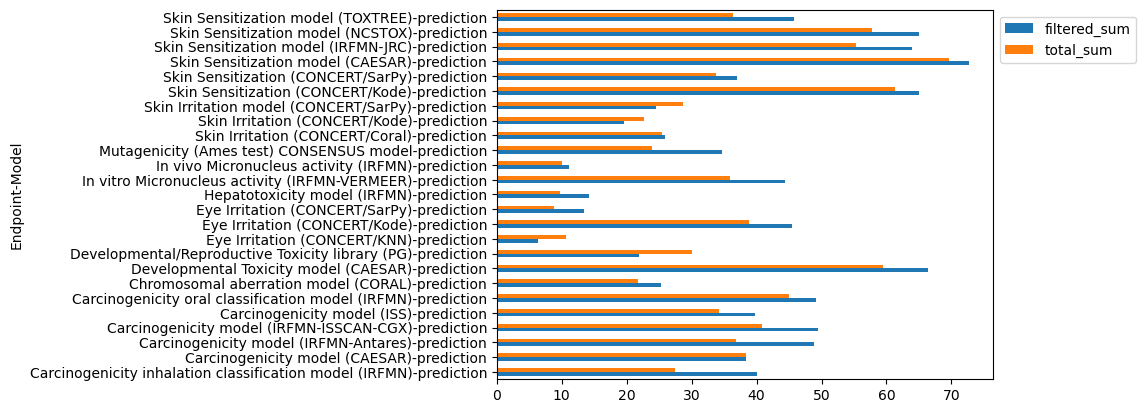

In [46]:
f = (result
 .reset_index()
 .rename(columns = {'level_1': 'VEGA % counts', 'level_0': 'Endpoint-Model'})
 .pivot(index = 'Endpoint-Model', columns = 'VEGA % counts', values = 0)
 .drop('final_picks')
 .plot(kind = 'barh', legend= True)
)
# Adjust the legend location
f.legend(loc='best', bbox_to_anchor=(1, 1))

# Save the figure
fig = f.get_figure()  # Get the figure from the Axes object

fig.savefig(figures_dir + 'figs2.png', dpi=300, bbox_inches='tight')
